# Normalization

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/wine_data - wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['class label','Alcohol','Malic acid']
df.head()

,class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

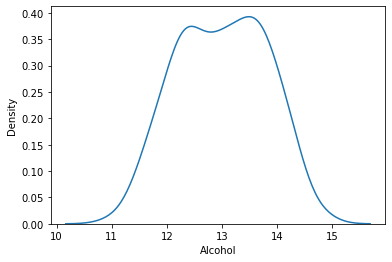

In [3]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

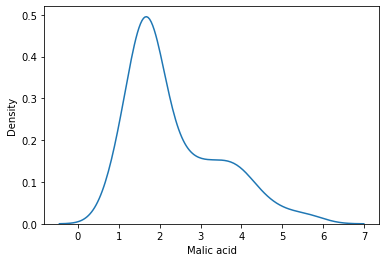

In [4]:
sns.kdeplot(df['Malic acid'])

C:\Users\User15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

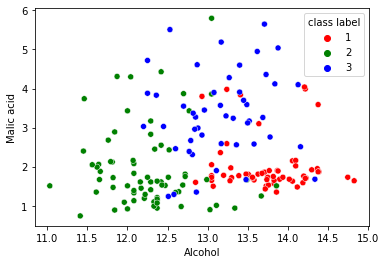

In [5]:
color_dict={1:'red',2:'green',3:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['class label'],palette=color_dict)

In [6]:
x = df.drop('class label',axis=1)
y = df['class label']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class label, Length: 178, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [9]:
from sklearn.preprocessing import MinMaxScaler #Normalization

scaler = MinMaxScaler()

In [10]:
scaler.fit(x_train)

MinMaxScaler()

In [11]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [12]:
x_test_scaled 

array([[0.68128655, 0.18379447],
       [0.40350877, 0.38142292],
       [0.28070175, 0.0770751 ],
       [0.62865497, 0.19565217],
       [0.47953216, 1.        ],
       [0.04385965, 0.25889328],
       [0.7748538 , 0.27865613],
       [0.27777778, 0.61067194],
       [0.24561404, 0.19565217],
       [0.19590643, 0.21541502],
       [0.57017544, 0.35968379],
       [0.72222222, 0.84980237],
       [0.81578947, 0.20158103],
       [0.28070175, 0.06521739],
       [0.63450292, 0.36363636],
       [0.17251462, 0.03557312],
       [0.6871345 , 0.15612648],
       [0.8128655 , 0.16798419],
       [0.35964912, 0.12252964],
       [0.70760234, 0.1798419 ],
       [0.49707602, 0.05335968],
       [0.47953216, 0.1798419 ],
       [0.53508772, 0.36561265],
       [0.32163743, 0.19565217],
       [0.26900585, 0.07114625],
       [0.3245614 , 0.33399209],
       [0.29824561, 0.15612648],
       [0.21929825, 0.17193676],
       [0.10233918, 0.38339921],
       [0.69298246, 0.39920949],
       [0.

In [13]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [14]:
x_train_scaled.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


In [15]:
x_test_scaled.describe()

,Alcohol,Malic acid
count,54.000000,54.000000
mean,0.476879,0.293991
std,0.246098,0.212118
min,0.000000,0.000000
25%,0.278509,0.168972
50%,0.479532,0.203557
75%,0.675439,0.382905
max,1.000000,1.000000


Text(0.5, 1.0, 'After Scaling')

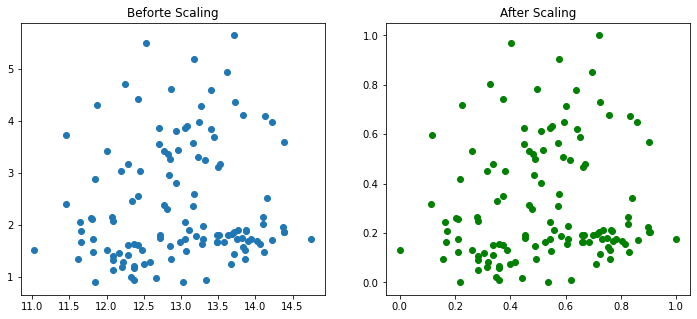

In [16]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize =(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Malic acid'])
ax1.set_title('Beforte Scaling')

ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],color='green')
ax2.set_title('After Scaling')


# Effects of Outliers in Normalization

In [17]:
df.describe()

,class label,Alcohol,Malic acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [18]:
df2 = pd.DataFrame({
    'Alcohol' : [30,35,40],
    'Malic acid' : [15,20,25],
    'class label' :[1,2,3]
})

In [19]:
df3 = df.append(df2)
df2.describe()


C:\Users\User15\AppData\Local\Temp\ipykernel_6208\1293780671.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df.append(df2)


,Alcohol,Malic acid,class label
count,3.0,3.0,3.0
mean,35.0,20.0,2.0
std,5.0,5.0,1.0
min,30.0,15.0,1.0
25%,32.5,17.5,1.5
50%,35.0,20.0,2.0
75%,37.5,22.5,2.5
max,40.0,25.0,3.0


C:\Users\User15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

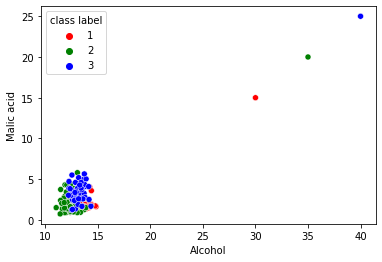

In [20]:
color_dict={1:'red',2:'green',3:'blue'}
sns.scatterplot(df3['Alcohol'],df3['Malic acid'],hue=df3['class label'],palette=color_dict)

In [21]:
x_train_o, x_test_o ,y_train_o,y_test_o = train_test_split(df3.drop('class label',axis=1),df3['class label'],
                                                  test_size=0.3,
                                                  random_state=0)

In [22]:
x_train_scaled_o = pd.DataFrame(scaler.fit_transform(x_train_o),columns=x_train.columns)
x_test_scaled_o = pd.DataFrame(scaler.fit_transform(x_test_o),columns=x_test.columns)

C:\Users\User15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

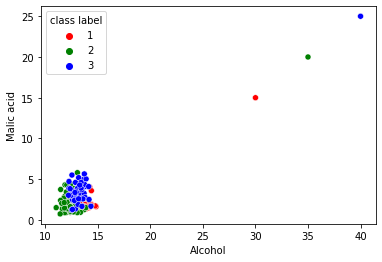

In [23]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(df3['Alcohol'],df3['Malic acid'],hue=df3['class label'],palette=color_dict)

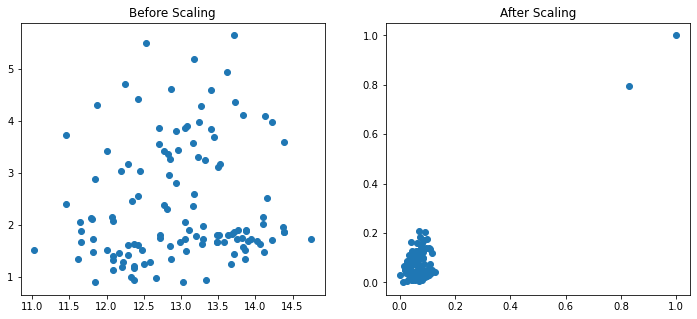

In [24]:
from matplotlib import pyplot as plt
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Malic acid'])
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled_o['Alcohol'],x_train_scaled_o['Malic acid'])
ax2.set_title('After Scaling')
plt.show()